Using the Weekly Foot Traffic to some retail store dataset provided, perform the following

Prerequisites: Load needed libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

1. Load and Visualize Dataset to check for non-stationarity

In [27]:
df = pd.read_csv('foot_traffic.csv')

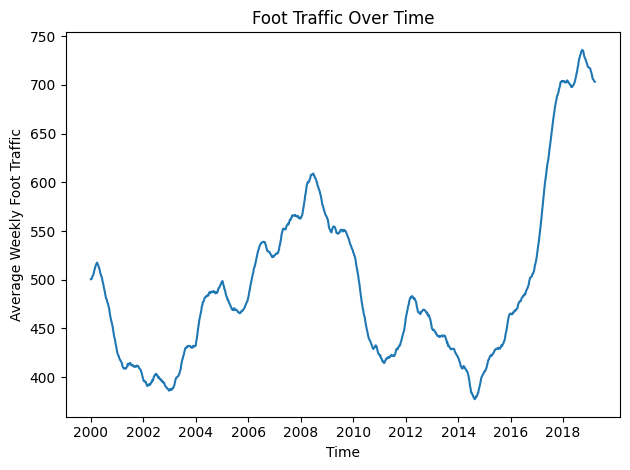

In [28]:
#Plot the data
fig, ax = plt.subplots()
ax.plot(df['foot_traffic'])
ax.set_title('Foot Traffic Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Average Weekly Foot Traffic')

#Label every 104 data points and label them as years
plt.xticks(np.arange(0,1000,104), np.arange(2000,2020,2))

#Show graph
plt.tight_layout()
plt.show()

2. Test for Stationarity using the augmented Dickey-Fuller Test

In [29]:
# Perform the ADF test
result = adfuller(df['foot_traffic'])

# Extract and print relevant statistics
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation based on p-value
if result[1] < 0.05:
    print("The time series is stationary")
else:
    print("The time series is non-stationary")

ADF Statistic: -1.17588859992407
p-value: 0.6838808917896209
The time series is non-stationary


3. Apply differencing to make the series stationary

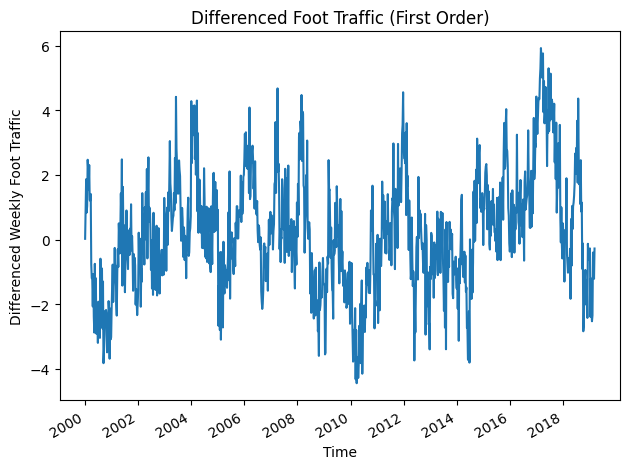

In [32]:
foot_traffic_diff = np.diff(df['foot_traffic'], n=1)

fig, ax = plt.subplots()
ax.plot(foot_traffic_diff)
ax.set_title('Differenced Foot Traffic (First Order)')
ax.set_xlabel('Time')
ax.set_ylabel('Differenced Weekly Foot Traffic')

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

4. Fit an ARIMA model to the differenced data

In [33]:
model = ARIMA(foot_traffic_diff, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1409.245
Date:                Sun, 20 Oct 2024   AIC                           2824.490
Time:                        21:32:14   BIC                           2839.208
Sample:                             0   HQIC                          2830.085
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4313      0.049     -8.720      0.000      -0.528      -0.334
ma.L1         -0.2185      0.055     -3.993      0.000      -0.326      -0.111
sigma2         0.9859      0.044     22.591      0.0

5. Forecast

In [35]:
forecast = model_fit.forecast(steps = 10)
print(forecast)

[-0.83021868 -0.59059851 -0.69395461 -0.64937371 -0.66860292 -0.66030872
 -0.66388629 -0.66234317 -0.66300876 -0.66272167]
